In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bill_authentication.csv')

In [3]:
X, Y = data.ix[:,:4], data.ix[:,4]

/Users/aakritigupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [4]:
def zscore(x, m, sigma):
    '''

    :param x: an array or Series (containing float or int)
    :return: normalised array or Series(x - x.mean/x.std())
    '''
    if m>0:
        mean = m
    else:
        mean = x.mean()
    if sigma>0:
        std = sigma
    else:
        std = np.std(x)
    if std< 0.000000001:
        std = math.exp(-8)
    x_normal = (x- mean)/std
    return x_normal, mean, std

def normalise_data(X,features, m=[], sigma=[]):
    '''

    :param X: Pandas DataFrame consisting of columns to normalised
    :param features: list of column names to be normalised
    :return: DataFrame with the required columns normalized
    '''
    mean = m
    std = sigma
    new_mean =[]
    new_std =[]
    if len(mean)==0 and len(std) ==0:
        for feature in features:
            X[feature], _mean, _std = zscore(X[feature],0, 0)
            new_mean.append(_mean)
            new_std.append(_std)
        return X, new_mean, new_std
    else:
        for i in range(len(features)):
            X[features[i]], _, _ = zscore(X[features[i]], mean[i], std[i])
        return X, mean, std




In [5]:
for column in X.columns:
    X[column], _, _ = normalise_data(X, X.columns)

In [6]:
X = np.asarray(X)
Y = np.asarray(Y)

In [7]:
from svm import Support_Vector_Machine

In [8]:
data_dict = {}

In [9]:
data_dict[-1] = X[Y==0] 
data_dict[1] = X[Y==1] 

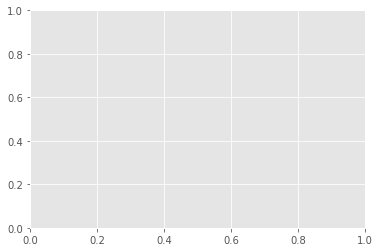

In [10]:
svm = Support_Vector_Machine()

In [11]:
svm.fit(data_dict)

[1.12180565 1.12180565 1.12180565 1.12180565] (2,) (4,) ()


ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

In [ ]:
svm.predict(Y)